In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# 분류 / 회귀

분류: 미리 정의된, 클래스 레이블 중 하나를 예측하는 것  
&nbsp; 이진 분류: 클래스 레이블이 두 개일 경우 ( ~ yes / no )  
&nbsp; 다중 분류: 클레스 레이블이 세 개 이상일 경우 ( 상승, 보합, 하락, ... )  
<br>
회귀: 연속적인 숫자를 예측하는 것  
<br>
분류와 회귀의 차이는 예측값의 연속성을 기준으로 판단할 수 있다

일반화: 처음 보는 데이터일지라도 모델이 정확하게 예측하도록 하는 것  
과대적합: 훈련 세트에 너무 맞춰져 모델이 지나치게 복잡한 경우  
과소적합: 모델이 지나치게 단순한 경우

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


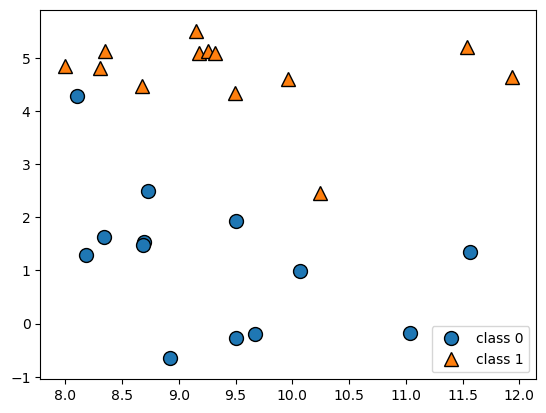

In [2]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[ : , 0], X[ : , 1], y)

plt.legend(["class 0", "class 1"], loc=4)

plt.show()

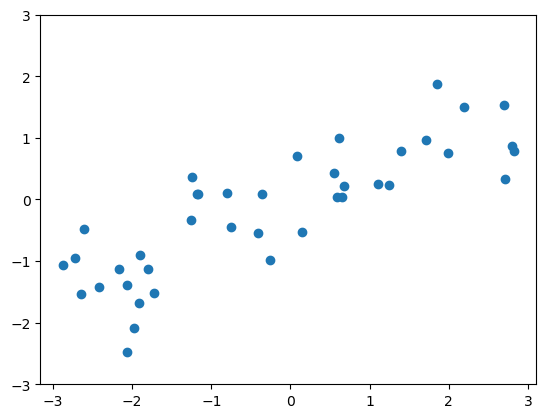

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)

plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
cancer.data.shape

(569, 30)

In [6]:
{n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.data.shape

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(506, 13)

# 지도학습

### kNN

아이디어: 근처에 있는 k개의 데이터와 비교해서 분류하자  
근처에 있는 k개의 데이터와 비교했을 때, 더 많은 쪽으로 분류  
&nbsp; ex. k=5고, 새로운 데이터 근처에 (C0: 1, C1: 1, C2: 3)개의 데이터가 있을 경우: C2로 분류

kNN의 동작  
&nbsp; 분류: 근처 k개의 데이터와 비교했을 때, 더 많이 있는 쪽으로 분류  
&nbsp; 회귀: weights='uniform'일 경우 k개 이웃의 단순 평균, 'distance'일 경우 거리에 따른 가중 평균으로 계산

이웃을 찾는 방법: algorithm 매개변수  
1. kd_tree: kd tree 알고리즘 사용 (공간을 평면으로 나누는 방식)
2. ball_tree: ball tree 알고리즘 사용  
전체를 큰 구, 그 안의 작은 구 여러개로 쪼개는 방식  
전체 데이터는 하나의 큰 구로 나타나고, 세부 클래스는 그 안의 작은 구로 표현된다  
구의 크기는 집단에서 가장 멀리 떨어진 데이터에 의해 결정된다
구는 웬만해선 서로 겹치지 않으며, 겹치는 곳에 있는 데이터는 어떤 구의 중심과 가까운지에 따라 분류 결과가 달라진다
3. brute: 전체 샘플 간의 거리를 계산하는 방식. 특성 개수가 15개 이상이거나 n_neighbors가 샘플 개수의 절반 이상일 때 사용
4. auto: fit에 전달된 데이터를 보고 알아서 결정

장점: 모델을 이해하기 쉽다, 어렵지 않게 만들 수 있다  
단점: 전처리가 필요하다, 특성 수가 많아지면 느려진다, 희소 데이터에 부적합하다

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


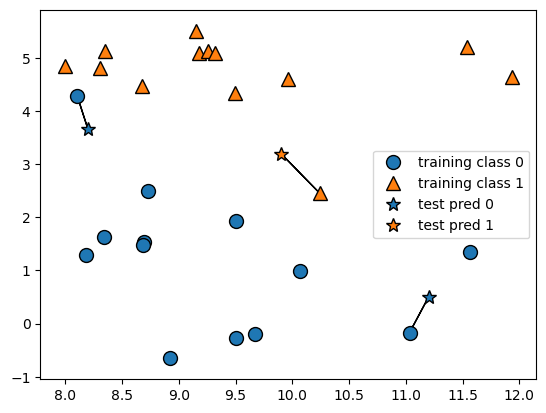

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


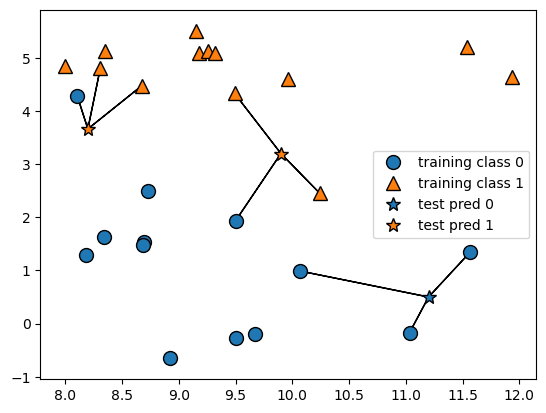

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.predict(X_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0, 1, 0, 0])

In [16]:
round(clf.score(X_test, y_test), 2)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.86

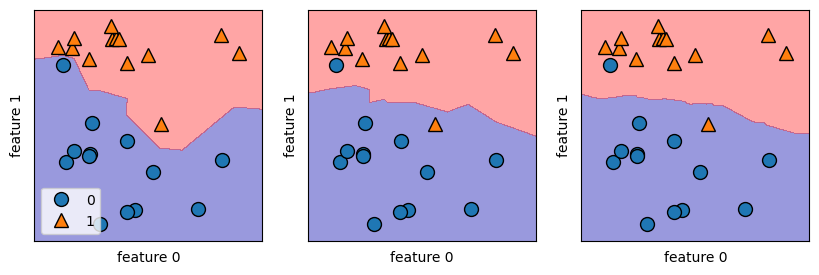

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[ : , 0], X[ : , 1], y, ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


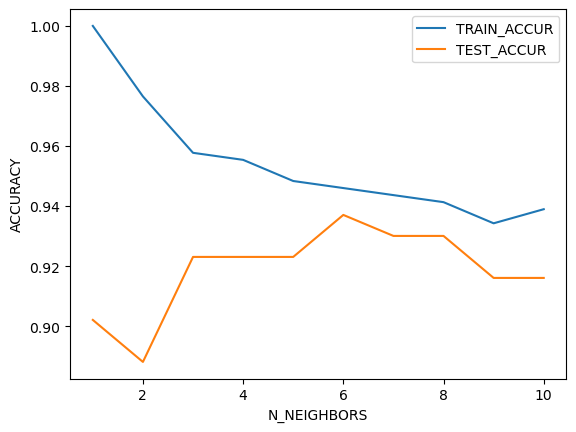

In [98]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings: 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="TRAIN_ACCUR")
plt.plot(neighbors_settings, test_accuracy, label="TEST_ACCUR")
plt.ylabel("ACCURACY")
plt.xlabel("N_NEIGHBORS")
plt.legend()
plt.show()

### kNN 회귀

예측 방법: 인근 n개 이웃 타깃 값 평균을 예측으로 삼는다

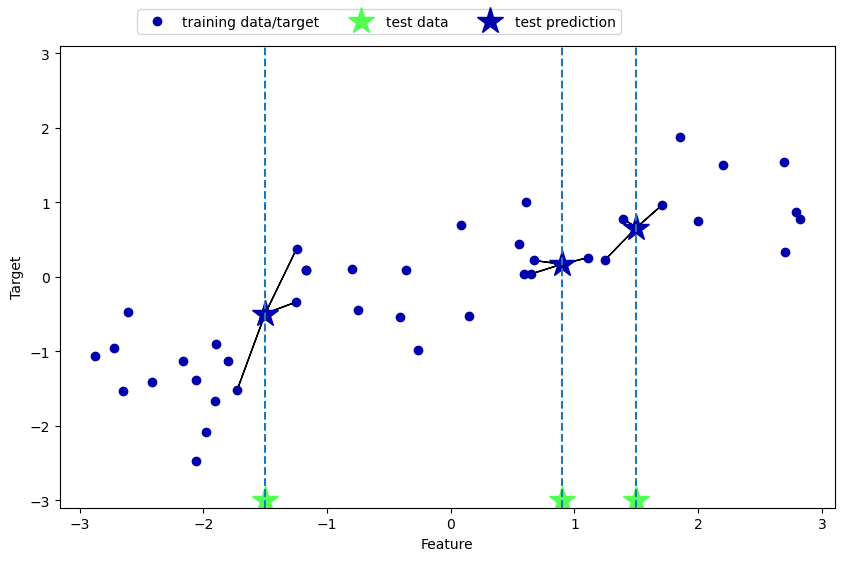

In [99]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [102]:
print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [104]:
print(reg.score(X_test, y_test))

0.8344172446249605


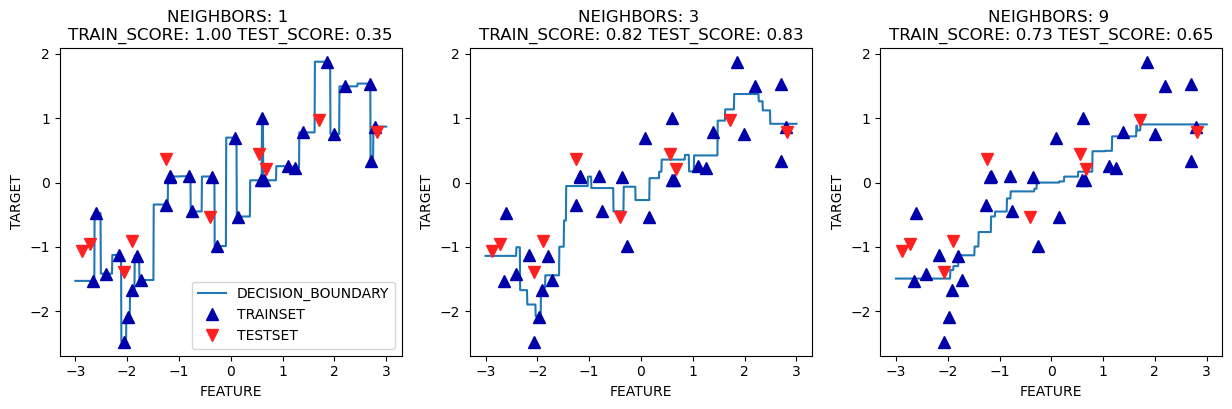

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes) : 
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "NEIGHBORS: {} \nTRAIN_SCORE: {:.2f} TEST_SCORE: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test),
            fontsize=8
        )
    )
    ax.set_xlabel("FEATURE")
    ax.set_ylabel("TARGET")

    
axes[0].legend(["DECISION_BOUNDARY", "TRAINSET", "TESTSET"], fontsize=10)

#### kNN의 장단점과 특징

- knn에서 중요한 매개변수 두 개는 거리 재는 방법, 이웃의 수다
- 거리 재는 방법은 기본 유클리디안 거리(metrics=). 기본값은 'minkowski'
- 장점: 이해가 쉽고, 적은 조정으로도 좋은 성능을 발휘한다
- 단점: 큰 데이터셋, 특성이 많은 데이터셋, 희소 데이터셋엔 부적합하다, 예측이 느리다
- 특징: 스케일에 민감하므로 정규화가 필요하다

In [122]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [123]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9520519609032729, 0.6074721959665845)

참고: score의 기본 결과는 $R^2$ score로, 다음과 같이 산출한다
> $R^2 \mbox{score} = 1 - { \sum(y-\hat{y})^2 \over \sum(y-\bar{y})^2 } $ ($\bar{y}$: 타깃 값의 평균)

In [124]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8857966585170941, 0.7527683481744755)

In [125]:
ridge_10 = Ridge(alpha=10).fit(X_train, y_train)

ridge_10.score(X_train, y_train), ridge.score(X_test, y_test)

(0.7882787115369614, 0.7527683481744755)

In [126]:
ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)

ridge_01.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9282273685001987, 0.7527683481744755)

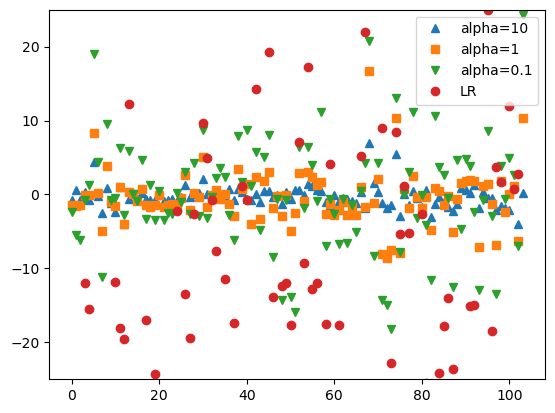

In [127]:
plt.plot(ridge_10.coef_, '^', label="alpha=10")
plt.plot(ridge.coef_, 's', label="alpha=1")
plt.plot(ridge_01.coef_, 'v', label="alpha=0.1")

plt.plot(lr.coef_, 'o', label="LR")

plt.ylim(-25, 25)

plt.legend()

plt.show()

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

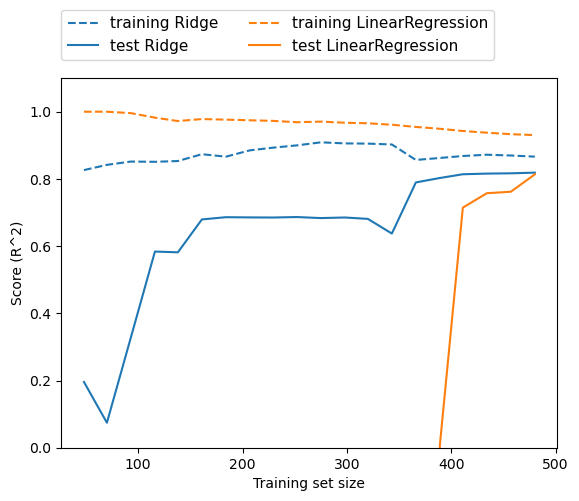

In [128]:
mglearn.plots.plot_ridge_n_samples()

In [129]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114607, 0.20937503255272294)

In [130]:
np.sum(lasso.coef_ != 0)

4

In [131]:
lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso_001.score(X_train, y_train), lasso_001.score(X_test, y_test)

(0.8962226511086497, 0.7656571174549983)

In [132]:
np.sum(lasso_001.coef_ != 0)

33

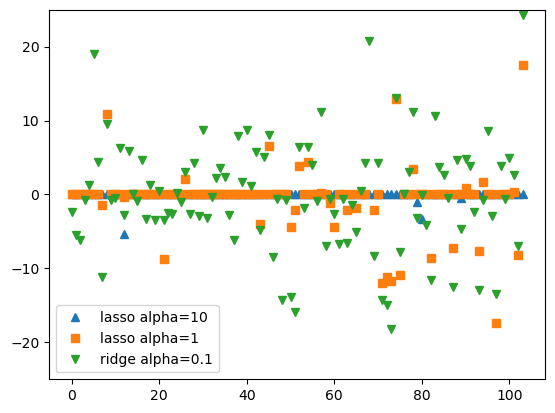

In [133]:
plt.plot(lasso.coef_, '^', label="lasso alpha=10")
plt.plot(lasso_001.coef_, 's', label="lasso alpha=1")
plt.plot(ridge_01.coef_, 'v', label="ridge alpha=0.1")

plt.ylim(-25, 25)

plt.legend()

plt.show()

규제를 가하는 것은 모델의 과대적합 정도를 줄이는 것?

규제를 가하는 것은 모델의 적합 정도를 조절하는것?

SVM에서 C가 커지는 것은 몸을 더 비틀어 넣는 것과 마찬가지

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

logreg = LogisticRegression().fit(X_train, y_train)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9483568075117371, 0.951048951048951)

In [32]:
logreg_100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9483568075117371, 0.951048951048951)

In [33]:
logreg_001 = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9483568075117371, 0.951048951048951)

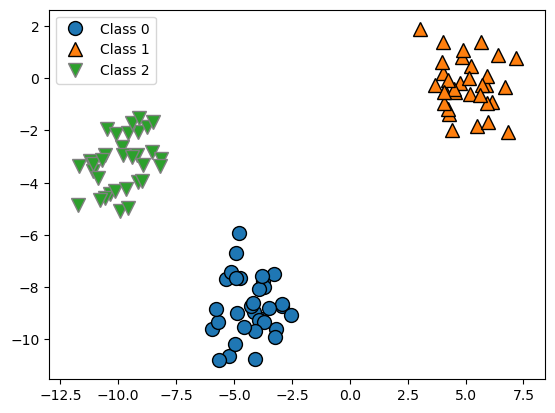

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs()

mglearn.discrete_scatter(X[ : , 0], X[ : , 1], y)
plt.legend(["Class 0", "Class 1", "Class 2"])

plt.show()

In [35]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

linear_svm.coef_, linear_svm.intercept_

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(array([[ 0.08583162, -0.4561766 ],
        [ 0.25083021,  0.07551533],
        [-0.32855405,  0.33722046]]),
 array([-2.07099309,  0.07584856, -0.47986669]))

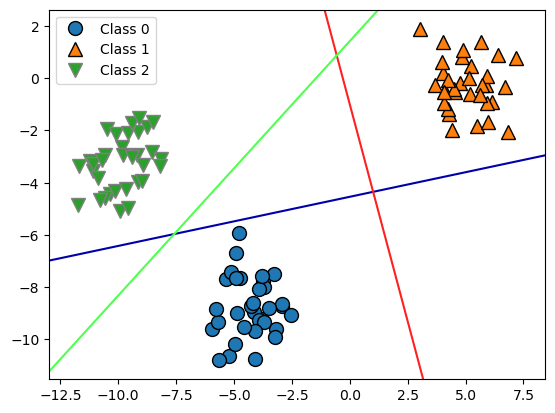

In [36]:
mglearn.discrete_scatter(X[ : , 0], X[ : , 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["Class 0", "Class 1", "Class 2"])


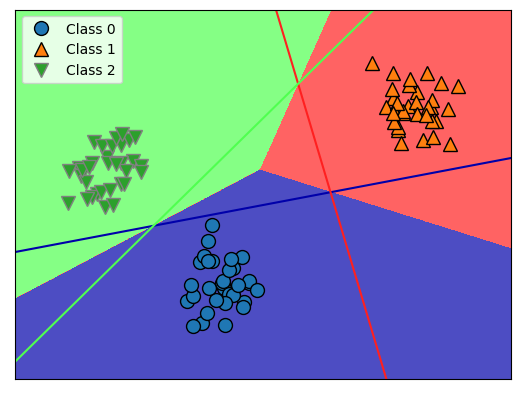

In [37]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[ : , 0], X[ : , 1], y)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["Class 0", "Class 1", "Class 2"])

plt.show()

결정 트리의 복잡도 제어  
1. 트리 생성 조기 중단: 사전 가지치기  
 - 깊이를 조정하는 경우: 일정 깊이에 도달하면 생성 중지
 - 불순도를 조정하는 경우
 - 사전에 노드 당 최소 샘플 수를 정하는 경우
 - 리프 노드 개수를 제한하는 경우

2. 트리 생성 후 불필요한 노드는 제거: 사후 가지치기
 - 생성 후 노드 수가 특정 개수 미만일 경우
 - 생성 후 노드를 병합하는 경우

\*\*\*sklearn은 사전 가지치기만 가능

### 트리의 특성 중요도

트리 구성 시 각 특성이 얼마나 중요했는지를 평가하는 수치  
0 ~ 1 사이의 값으로, 특성 중요도 전체 합은 1이다   
&nbsp; 0 >>> 전혀 사용하지 않음  
&nbsp; 1 >>> 이 특성으로 완벽하게 타깃 클래스를 예측함  
\*** 여기선 worst_radius가 가장 중요한 특성이라고 볼 수 있다

주의  
1. feature_importance_ 값이 낮다고 유용하지 않은 것이 아니다 
\>>> 다른 특성이 동일한 정보를 갖고 있기 때문일 수도 있음
2. 값이 크다고 양성을 의미하는 것은 아니다

In [38]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [41]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [42]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.ylim(-1, n_features)

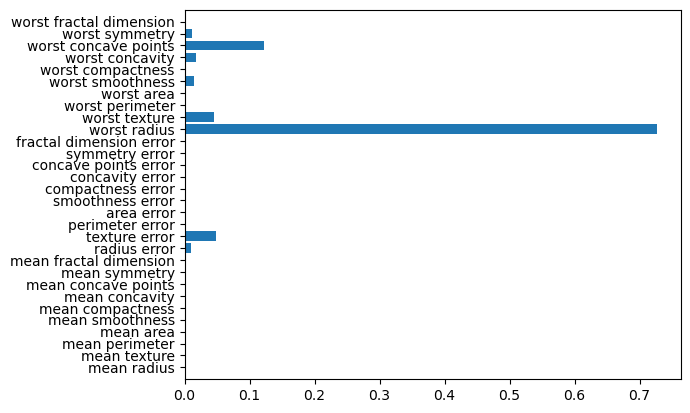

In [43]:
plot_feature_importances_cancer(tree)

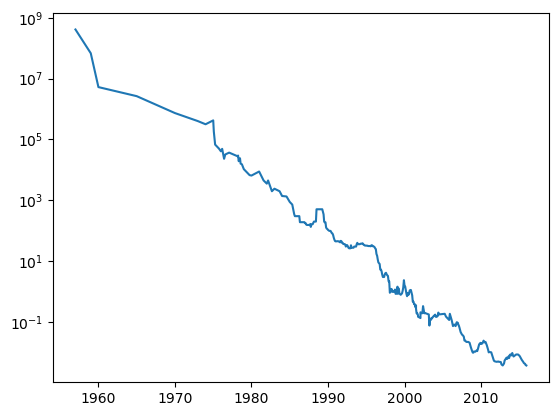

In [44]:
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)

In [45]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]

X_train = data_train.date[ : , np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[ : , np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\rksla\AppData\Local\Temp\ipykernel_25864\802284784.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[ : , np.newaxis]
C:\Users\rksla\AppData\Local\Temp\ipykernel_25864\802284784.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[ : , np.newaxis]


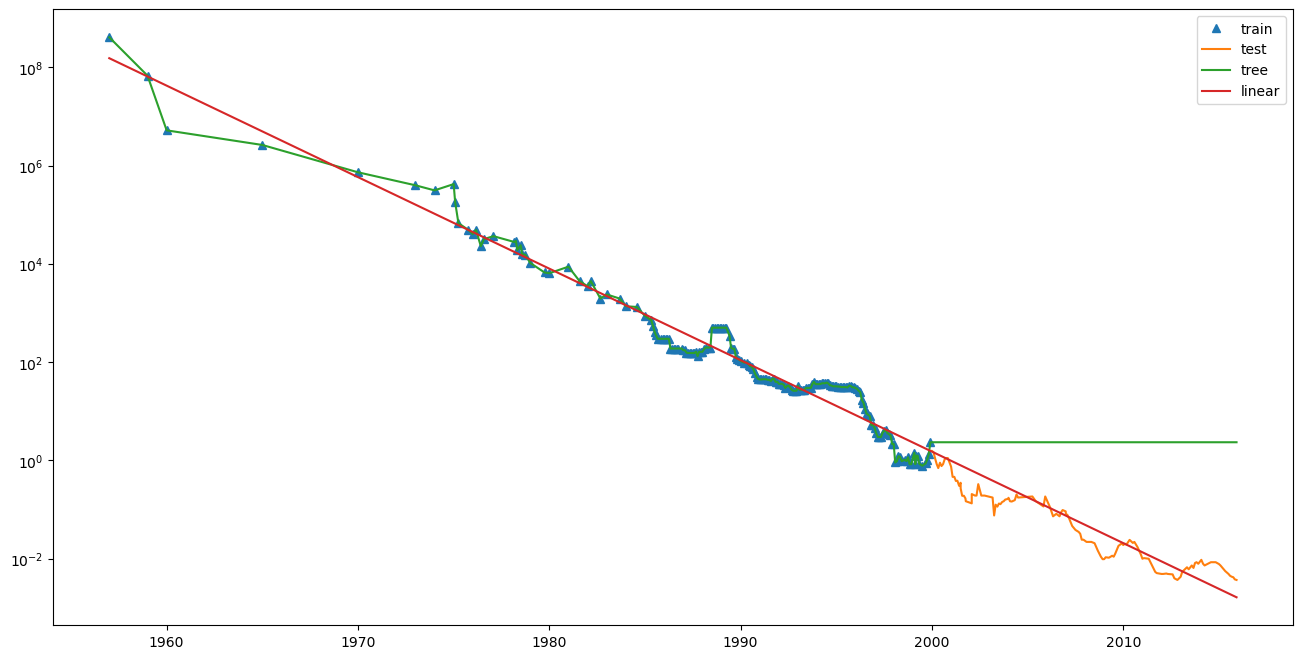

In [50]:
plt.figure(figsize=(16, 8))

plt.semilogy(data_train.date, data_train.price, '^', label="train")
plt.semilogy(data_test.date, data_test.price, label="test")
plt.semilogy(ram_prices.date, price_tree, label="tree")
plt.semilogy(ram_prices.date, price_lr, label="linear")

plt.legend()

plt.show()

트리 기반의 회귀 모델 사용 시 주의사항 <br>
시계열 데이터엔 부적합하다<br>
&nbsp; >>> 외삽(훈련셋 범위 밖의 데이터)에 대해선 처음/마지막 포인트로 예측 <br>
&nbsp; >>> 훈련셋 범위 밖의 데이터는 예측 불가 못하기 때문 

시계열 데이터일지라도 패턴 예측에는 좋을까?

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

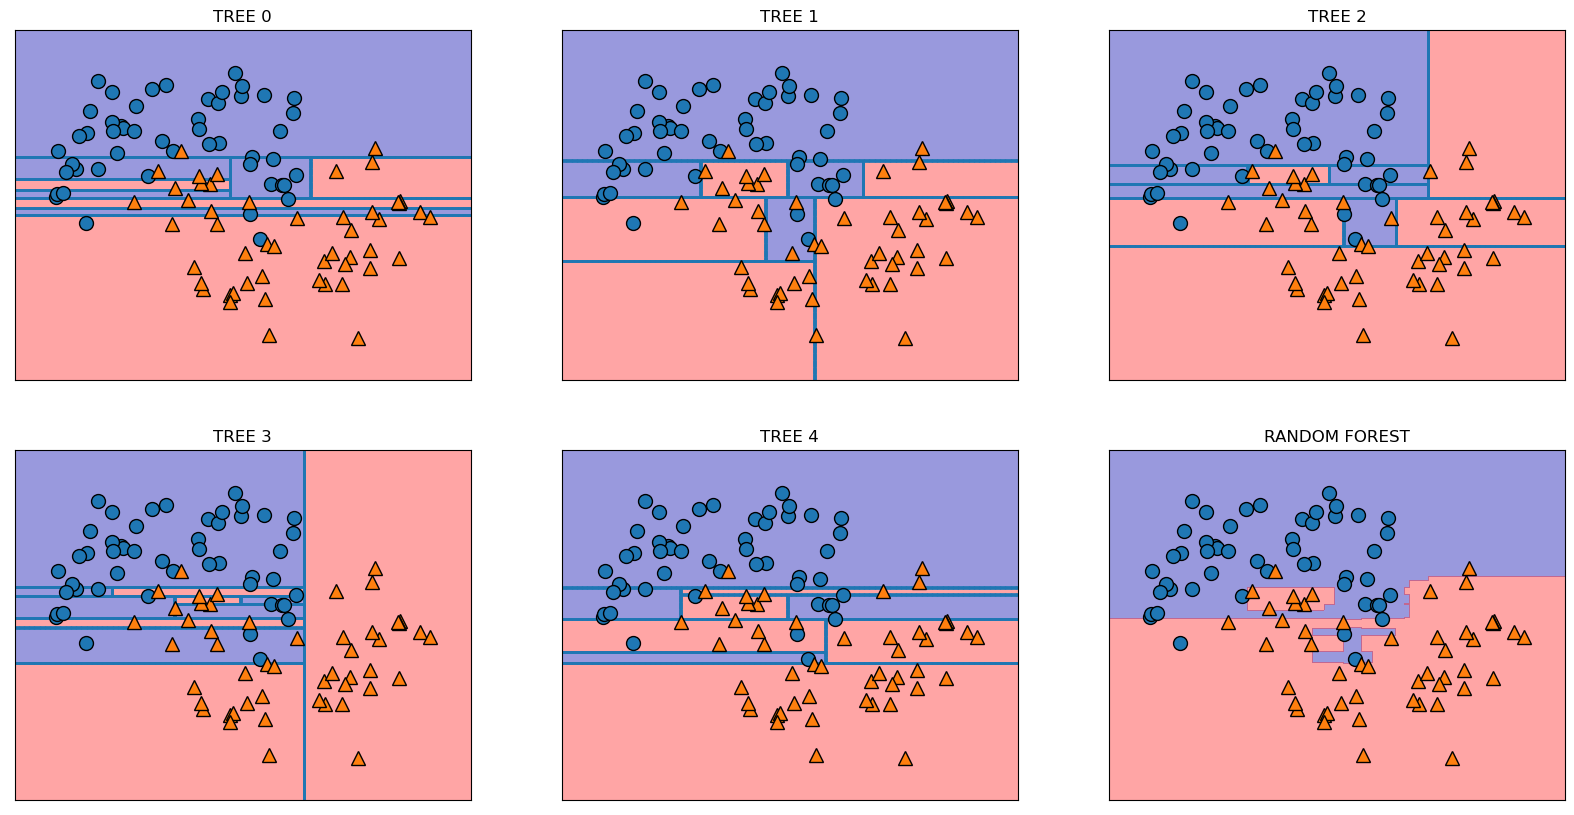

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("TREE {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("RANDOM FOREST")
mglearn.discrete_scatter(X[ : , 0], X[ : , 1], y)

plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.958041958041958)

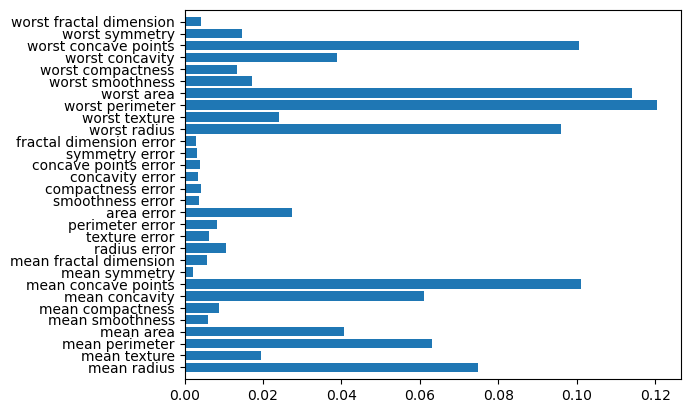

In [54]:
plot_feature_importances_cancer(forest)

주의사항<br>
1. 랜덤 포레스트는 단일 트리에 비해 훨씬 더 복잡해질 수 있다 <br>
&nbsp; 단순히 결과를 보여주기 위함이라면 단일 결정 트리가 좋을 수 있음
2. 고차원 / 희소 데이터에는 부적합할 수 있다 <br>
3. 그 전과 똑같은 모델을 만들려면 시드를 고정해야 한다

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.958041958041958)

In [56]:
gbrt = GradientBoostingClassifier(max_depth=1)

gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [57]:
gbrt = GradientBoostingClassifier(learning_rate=0.01)

gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9812206572769953, 0.9370629370629371)

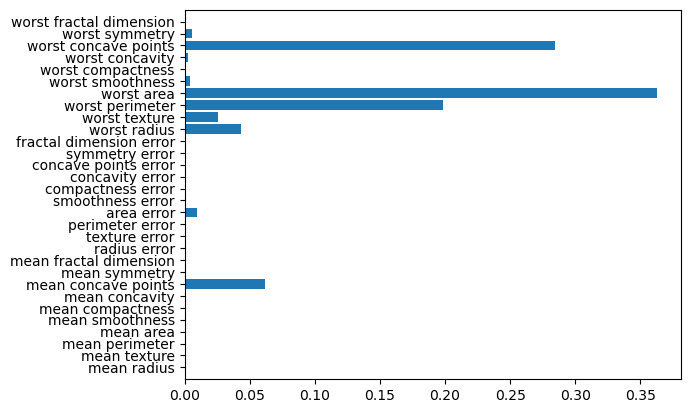

In [58]:
gbrt = GradientBoostingClassifier(max_depth=1)

gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

그래디언트 부스팅의 매개변수  
n_estimators: 트리 개수 지정  
learning_rate: 학습률 <br>
<br>
주의사항: 매개변수 조정 필요 + 긴 훈련 시간 + 희소한 고차원 데이터에는 잘 작동하지 않음

### 그 외 다른 앙상블

#### 1. 배깅: Bootstrap aggregating

알고리즘 하나를 훈련셋의 부트스트랩 샘플 여러개로 훈련시키는 방식

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(
    LogisticRegression(solver='liblinear'), 
    n_estimators=100,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [61]:
print(
    """
        SCORE(train): {}\n
        SCORE(test): {}\n
        SCORE(oob_set): {}
    """.format(
        bagging.score(Xc_train, yc_train),
        bagging.score(Xc_test, yc_test),
        bagging.oob_score_
    )
)


        SCORE(train): 0.9624413145539906

        SCORE(test): 0.958041958041958

        SCORE(oob_set): 0.9483568075117371
    


In [62]:
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

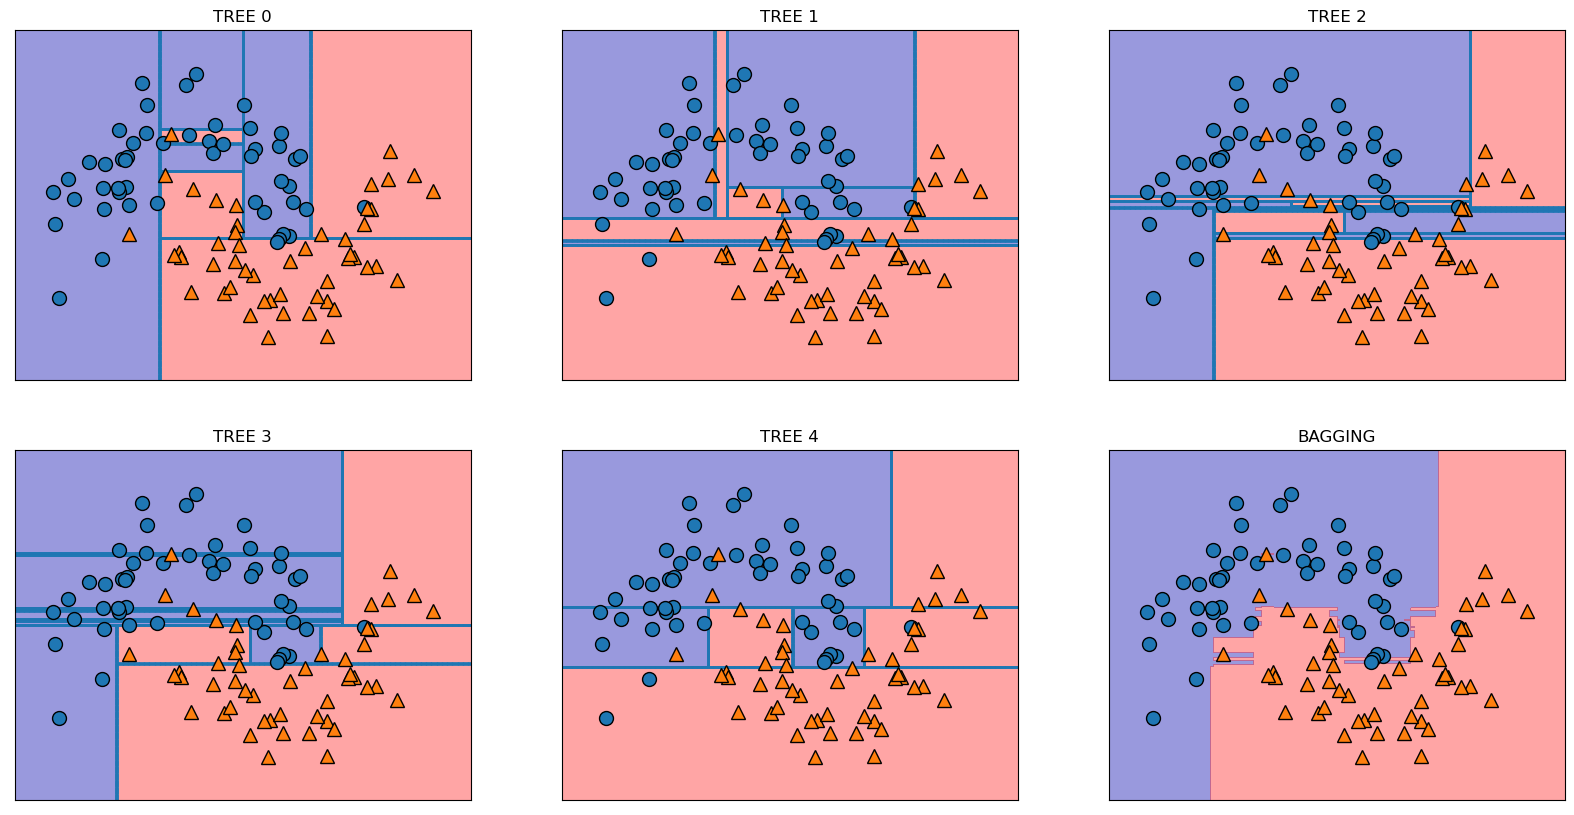

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("TREE {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("BAGGING")
mglearn.discrete_scatter(Xm[ : , 0], Xm[ : , 1], ym)

plt.show()

In [64]:
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [65]:
print(
    """
        SCORE(train): {}\n
        SCORE(test): {}\n
        SCORE(oob_set): {}
    """.format(
        bagging.score(Xc_train, yc_train),
        bagging.score(Xc_test, yc_test),
        bagging.oob_score_
    )
)


        SCORE(train): 1.0

        SCORE(test): 0.965034965034965

        SCORE(oob_set): 0.9483568075117371
    


#### 2. 엑스트라 트리

특징  
1. splitter=random >>> 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾는다
2. non bootstrap sampling (단, bootstrap=True로 하면 사용 가능)<br>

결론: 무작위 샘플링 + 무작위 특성 선택<br>
효과: 분산 감소, 편향 증가 >>> 과대적합 확률 감소 + 과소적합 확률 증가

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

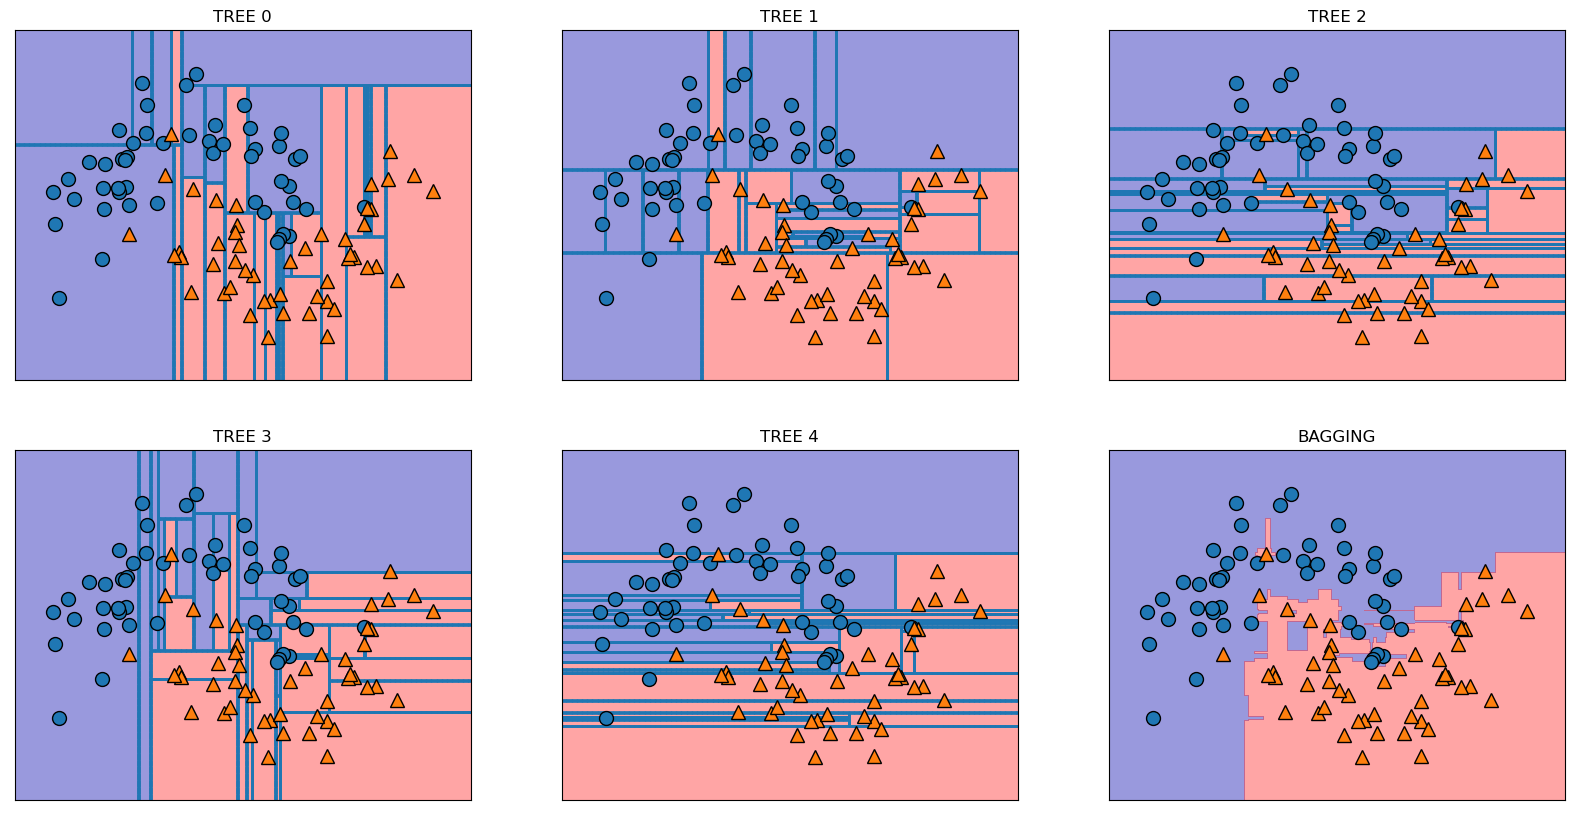

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("TREE {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("BAGGING")
mglearn.discrete_scatter(Xm[ : , 0], Xm[ : , 1], ym)

plt.show()

In [68]:
xtree = ExtraTreesClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)
xtree.fit(Xc_train, yc_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [69]:
print(
    """
        SCORE(train): {}\n
        SCORE(test): {}
    """.format(
        xtree.score(Xc_train, yc_train),
        xtree.score(Xc_test, yc_test)
    )
)


        SCORE(train): 1.0

        SCORE(test): 0.951048951048951
    


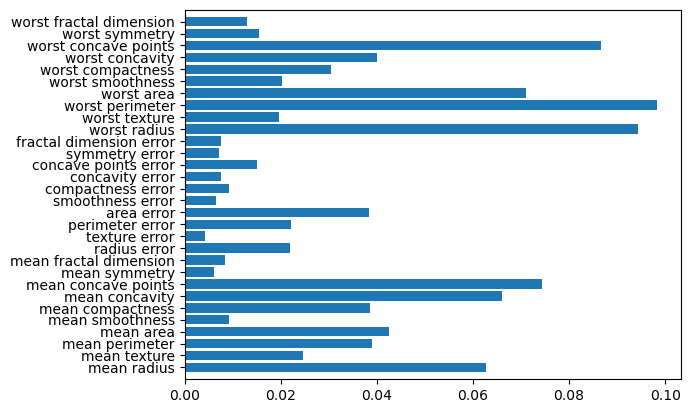

In [70]:
n_features = cancer.data.shape[1]

plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.ylim(-1, n_features)
plt.show()

#### 3. Adaboost

특징  
1. 약한 학습기의 연결
2. 이전 모델이 잘못 분류한 샘플에 가중치를 높여서 계산
3. 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택
4. 분류눈 DecisionTreeClf(max_depth=1), 회귀는 DecisionTreeClf(max_depth=3) 사용
5. 4를 바꾸려면 base_estimator 옵션으로 지정 (ex. base_estimator=SGDClassifier(...))

그래디언트 부스팅과의 차이<br>
&nbsp; 그래디언트 부스팅: 표본과 표본 추정의 차이를 이용해 다음 모델 구축 >>> 잔차를 이용해 모델 구축<br>
&nbsp; 에이다부스팅: 잘못 분류한 표본에 가중치를 부여해 다음 모델 구축

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5, random_state=42)

ada.fit(Xm_train, ym_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

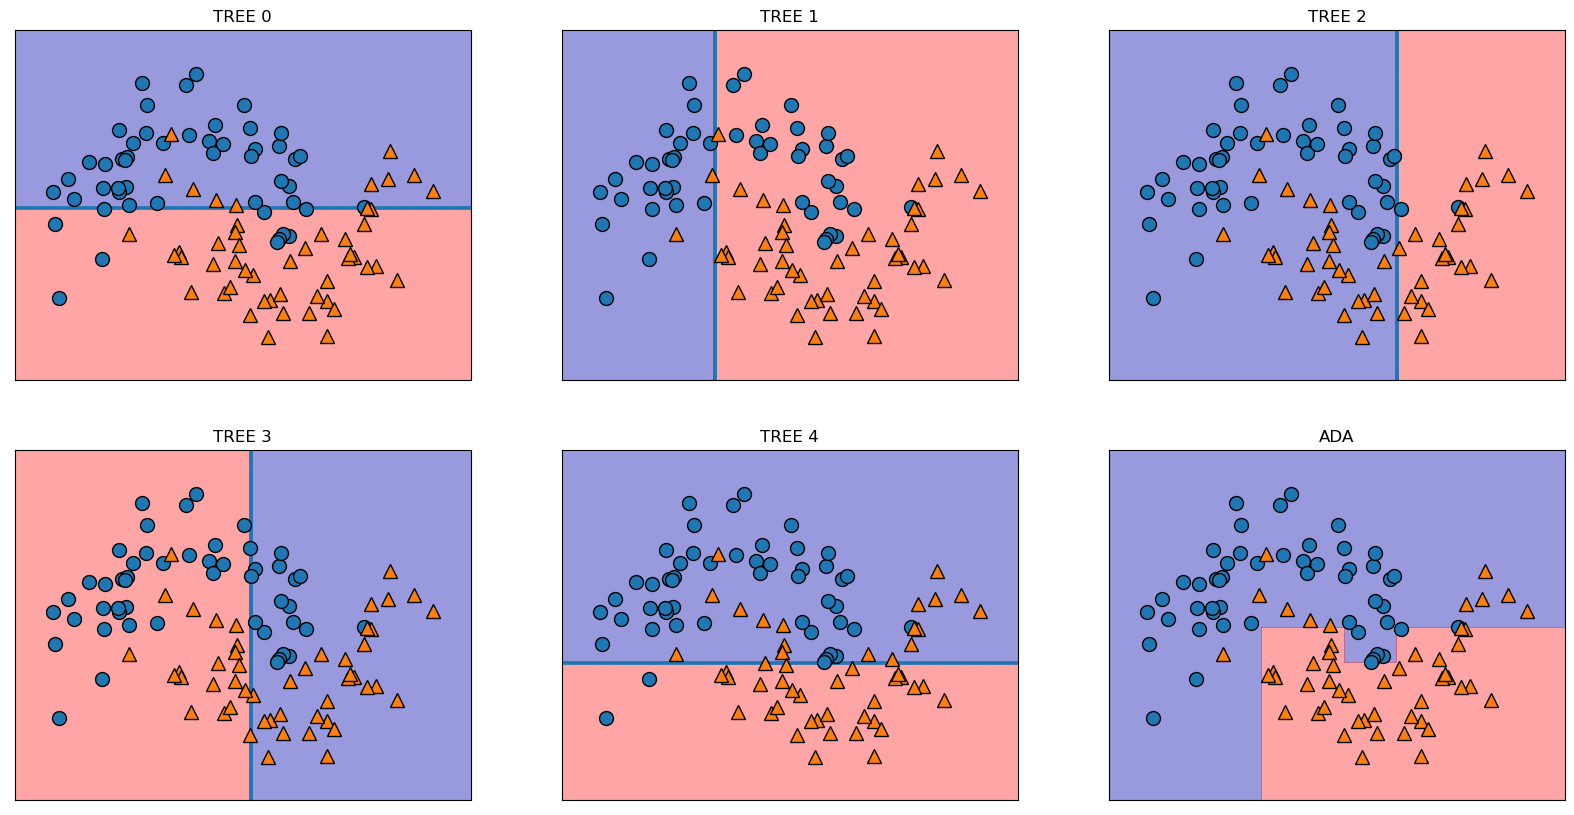

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("TREE {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("ADA")
mglearn.discrete_scatter(Xm[ : , 0], Xm[ : , 1], ym)

plt.show()

In [73]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print(
    """
        SCORE(train): {}\n
        SCORE(test): {}
    """.format(
        ada.score(Xc_train, yc_train),
        ada.score(Xc_test, yc_test)
    )
)


        SCORE(train): 1.0

        SCORE(test): 0.986013986013986
    


#### 3. 히스토그램 기반 부스팅

특징
1. 입력 특성을 기본 256개로 나눠 노드를 분할할 때 최적의 분할을 찾아내는 방식  
\>>> 특성 1, 특성 2, ...가 아닌 (특성 1의 0~10 까지, 특성 3의 1.5~2.5까지)와 같은 방식으로 나눈다
2. 누락된 값을 위해 전처리할 필요가 없다

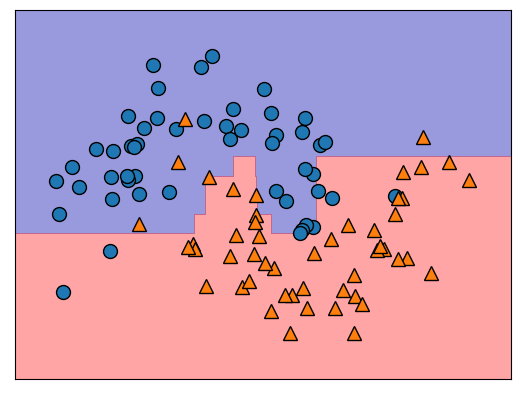

In [74]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xm_train, ym_train)

mglearn.plots.plot_2d_separator(hgb, Xm, fill=True, alpha=0.4)
mglearn.discrete_scatter(Xm[ : , 0], Xm[ : , 1], ym)

plt.show()

In [75]:
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xc_train, yc_train)

print(
    """
        SCORE(train): {}\n
        SCORE(test): {}
    """.format(
        hgb.score(Xc_train, yc_train),
        hgb.score(Xc_test, yc_test)
    )
)


        SCORE(train): 1.0

        SCORE(test): 0.9790209790209791
    


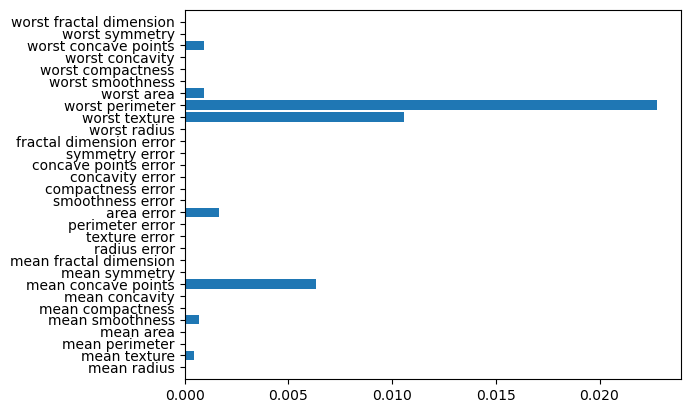

In [76]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    hgb, 
    Xc_train, yc_train,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

plt.barh(range(n_features), result.importances_mean, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.ylim(-1, n_features)

plt.show()

# 분류 예측의 불확실성 추정

?  
  
정확한 클래스라고 얼마나 확신하는지 알아내는 것

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 결정 함수

In [78]:
print("X_test.shape: ", X_test.shape)
print("DECISION FUNCTION SHAPE: ", gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
DECISION FUNCTION SHAPE:  (25,)


결정 함수 결과 해석: 모델이 데이터 포인트가 양성 클래스(==1)에 속한다고 믿는 정도  
&nbsp; 양성 >>> 양수로 표현
&nbsp; 음성 >>> 음수로 표현

In [79]:
gbrt.decision_function(X_test)[ : 6]

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081])

In [80]:
print("compare to threshold", gbrt.decision_function(X_test) > 0)
print("predict: ", gbrt.predict(X_test))

compare to threshold [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
predict:  ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


C:\Users\rksla\AppData\Local\Temp\ipykernel_25864\936851797.py:15: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


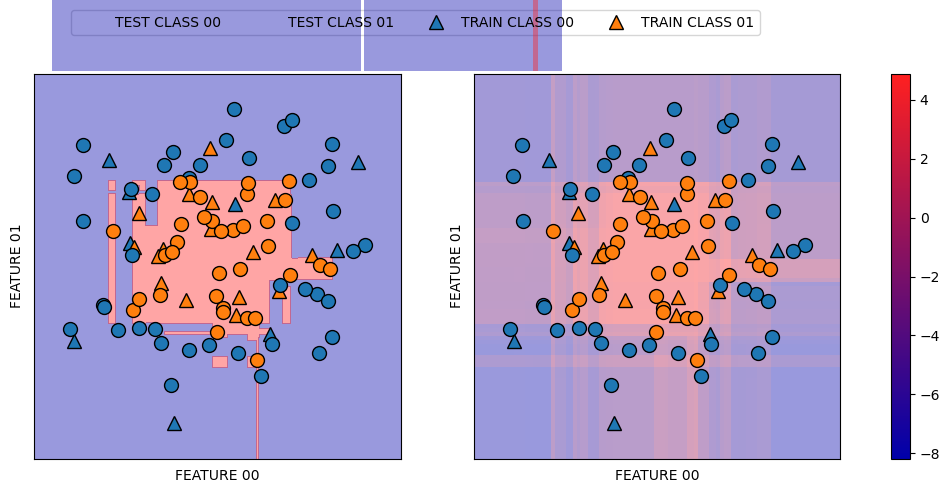

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[ : , 0], X_test[ : , 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[ : , 0], X_train[ : , 1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel("FEATURE 00")
    ax.set_ylabel("FEATURE 01")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()

axes[0].legend(
    ["TEST CLASS 00", "TEST CLASS 01", "TRAIN CLASS 00", "TRAIN CLASS 01"],
    ncol=4,
    loc=(0.1, 1.1)
)

### 예측 확률

결과: \[클래스 0으로 예측할 확률, 1로 예측할 확률, ... n로 예측할 확률\]  
총합: 1 + 그 중 하나는 ( p_i > 0.5 ) >>> 해당 클래스로 분류<br>
<br>
정말 만약에 [0.500000..., 0.500000...]과 같이 나왔다면 둘 중 하나를 임의로 고른다

불확실성과 모델의 정확도가 동등하면 모델이 보정되었다고 표현한다  
\>>> 보정된 모델에서 p%의 확신을 가진 예측은 p%의 정확도를 낼 것이라고 볼 수 있다

C:\Users\rksla\AppData\Local\Temp\ipykernel_25864\4014138299.py:15: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


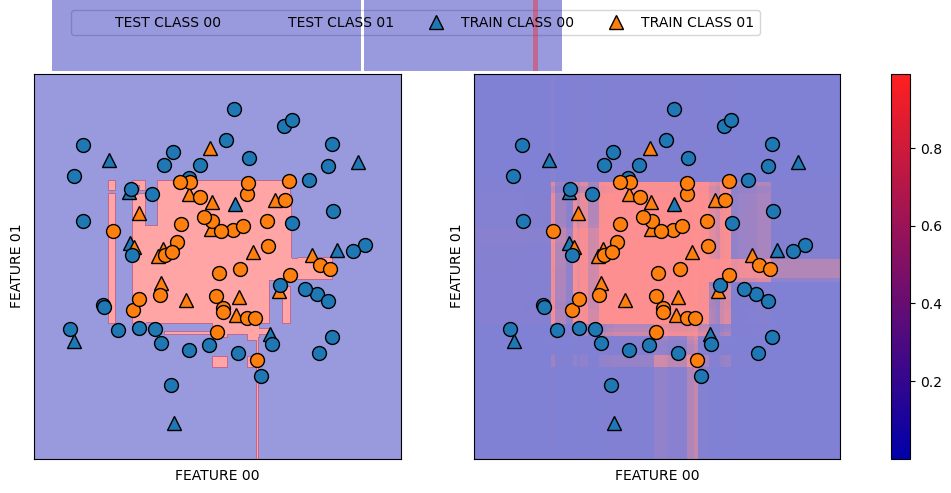

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    mglearn.discrete_scatter(X_test[ : , 0], X_test[ : , 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[ : , 0], X_train[ : , 1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel("FEATURE 00")
    ax.set_ylabel("FEATURE 01")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()

axes[0].legend(
    ["TEST CLASS 00", "TEST CLASS 01", "TRAIN CLASS 00", "TRAIN CLASS 01"],
    ncol=4,
    loc=(0.1, 1.1)
)

### 다중 분류에서의 불확실성

In [83]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    random_state=42
)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

다중 분류에서 decision_function(테스트셋)의 결과 형태는 (테스트셋 길이 * 클래스 수)

In [84]:
gbrt.decision_function(X_test).shape

(38, 3)

점수가 클수록 해당 클래스일 가능성이 크다고 판단

In [85]:
gbrt.decision_function(X_test)[ : 6]

array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758]])

In [86]:
np.argmax(gbrt.decision_function(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0], dtype=int64)

In [87]:
gbrt.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

다중 분류에서도 클래스 예측 확률 총합은 1

In [88]:
gbrt.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [89]:
np.argmax(gbrt.predict_proba(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0], dtype=int64)

In [90]:
gbrt.classes_

array([0, 1, 2])

### 예측을 확인할 때 주의사항 

클래스가 문자열 / 정수형이지만 연속적이지 않고 0부터 시작하지 않을 수 있다  
\>>> predict의 결과와 decision_function / predict_proba의 결과를 비교하려면 분류기의 classes_ 속성을 사용해 클래스의 실제 이름을 알아야 한다<br>
<br>
\>>> 클래스가 숫자로 표현되었을 경우 decision_function / predict_proba의 np.argmax 결과와 같고, 이것이 예측 클래스가 되지만 클래스의 숫자가 "1"과 같은 형태이거나 연속된 숫자가 아닐 수 있으므로 classes_를 항상 확인해봐야 한다

In [91]:
logreg = LogisticRegression(max_iter=1000)

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

LogisticRegression(max_iter=1000)

In [92]:
logreg.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [93]:
logreg.predict(X_test)[ : 5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

In [94]:
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
argmax_dec_func[ : 10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1], dtype=int64)

In [95]:
logreg.classes_[argmax_dec_func][ : 10]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')